In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part_1 - Importing and Filtering The Data

In [ ]:
data = pd.read_csv('housing.csv')
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Checking for any Null values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.dropna(inplace=True)  # Dropping elements containing Null values as they are a small percentage of the data

# I will use One Hot Encoding to turn the ocean_proximity into numerical features

Then drop the original feature

In [ ]:
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [ ]:
# <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, ISLAND

data['<1H OCEAN']  = (data['ocean_proximity'] == '<1H OCEAN').astype(int)
data['INLAND']     = (data['ocean_proximity'] == 'INLAND').astype(int)
data['NEAR OCEAN'] = (data['ocean_proximity'] == 'NEAR OCEAN').astype(int)
data['NEAR BAY']   = (data['ocean_proximity'] == 'NEAR BAY').astype(int)
data['ISLAND']     = (data['ocean_proximity'] == 'ISLAND').astype(int)

filtered_data = data.drop(['ocean_proximity'], axis=1)

- Place my target_Variable at the end of the DataFrame for Clarity

In [ ]:
filtered_data['median_house_value'] = filtered_data.pop('median_house_value')
filtered_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


# Plotting The correlation heat map

In [ ]:
def plot_corr_heatmap(my_data):

  numeric_train_data = my_data.select_dtypes(include=['number'])

  plt.figure(figsize=(15,8))
  sns.heatmap(numeric_train_data.corr(), cmap='YlGnBu', annot=True, fmt='.2f')

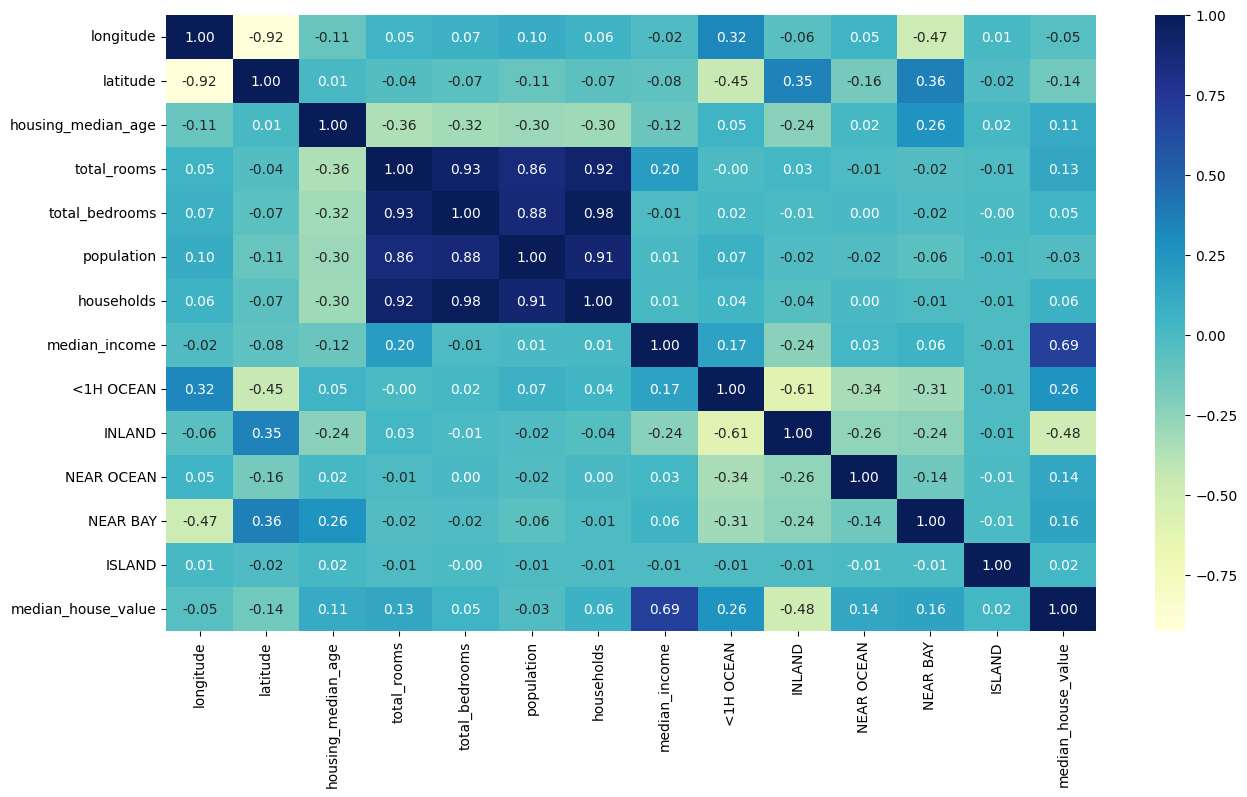

In [ ]:
plot_corr_heatmap(filtered_data)

'median_income' is the most important feature having the highest correlation

followed by 'INLAND' which has a negative correlation

<Axes: xlabel='latitude', ylabel='longitude'>

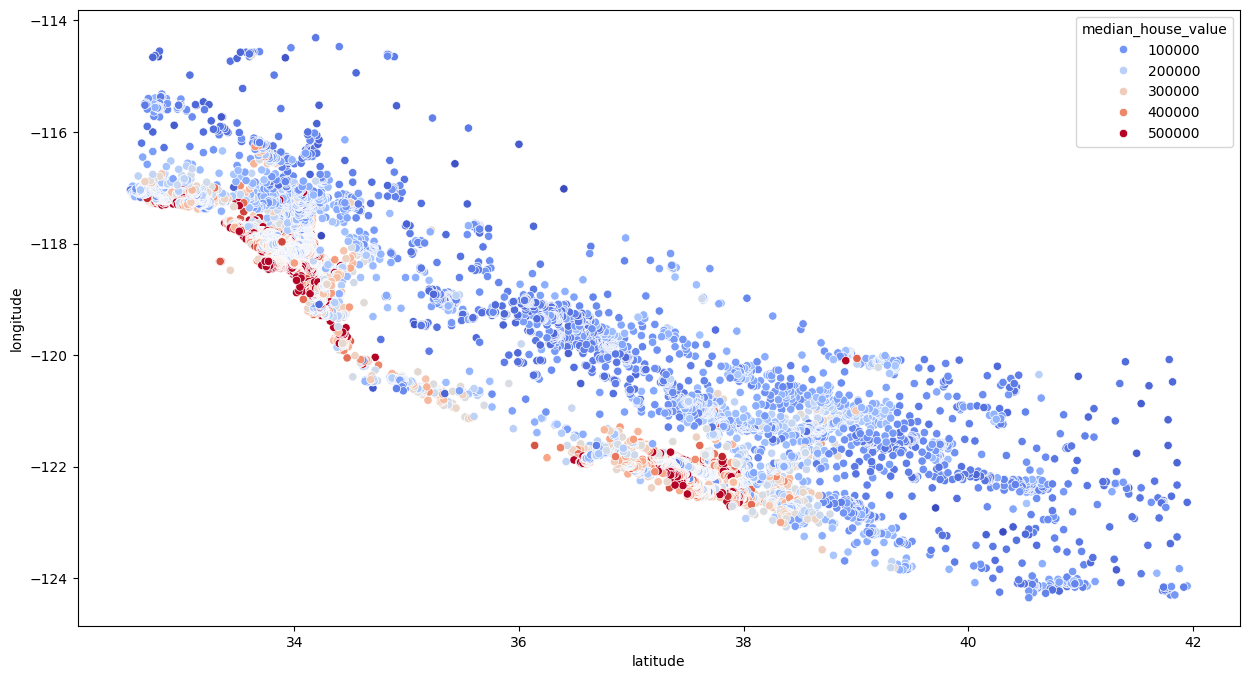

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=filtered_data, hue='median_house_value', palette='coolwarm')

We can see the Red points represent the more expensive houses and they are along the coastline and the 'INLAND' houses are of cheaper value

I noticed 3 features with low abs(correlation)

  1- 'households'     -> Number of houses in a block

  2- 'total_rooms'    -> Number of rooms in a block

  3- 'total_bedrooms' -> Number of Bedrooms in a block


I think that a

  1- 'Avg_rooms_per_house'

  2- 'Avg_bedrooms_per_house'

would be better for our situation

In [ ]:
filtered_data.insert(loc=3, column='Avg_rooms_per_house', value=filtered_data['total_rooms'] / filtered_data['households'])
filtered_data.insert(loc=4, column='Avg_bedrooms_per_house', value=filtered_data['total_bedrooms'] / filtered_data['households'])
filtered_data

,longitude,latitude,housing_median_age,Avg_rooms_per_house,Avg_bedrooms_per_house,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR OCEAN,NEAR BAY,ISLAND,median_house_value
0,-122.23,37.88,41.0,6.984127,1.023810,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0,452600.0
1,-122.22,37.86,21.0,6.238137,0.971880,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0,358500.0
2,-122.24,37.85,52.0,8.288136,1.073446,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0,352100.0
3,-122.25,37.85,52.0,5.817352,1.073059,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0,341300.0
4,-122.25,37.85,52.0,6.281853,1.081081,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,5.045455,1.133333,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0,78100.0
20636,-121.21,39.49,18.0,6.114035,1.315789,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0,77100.0
20637,-121.22,39.43,17.0,5.205543,1.120092,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0,92300.0
20638,-121.32,39.43,18.0,5.329513,1.171920,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0,84700.0


Lets try the correlation heatmap once again

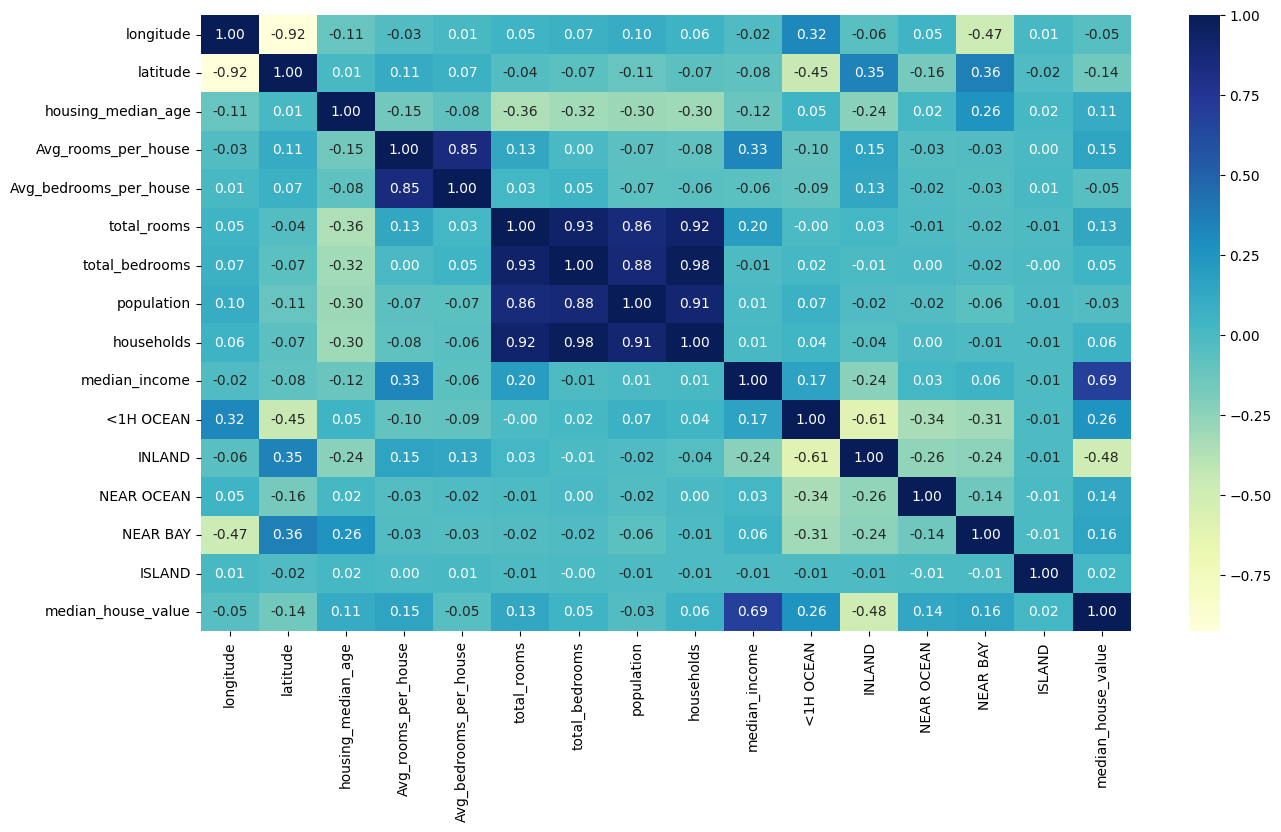

In [ ]:
plot_corr_heatmap(filtered_data)

I will keep 'Avg_rooms_per_house' as it has slightly better correlation than the old features

I will scrap 'Avg_bedrooms_per_house' as it gave no better insight

I will also remove the 3 irrelevent features from earlier







In [ ]:
final_filtered_data = filtered_data.drop(['Avg_bedrooms_per_house', 'total_rooms', 'total_bedrooms', 'households'], axis=1)

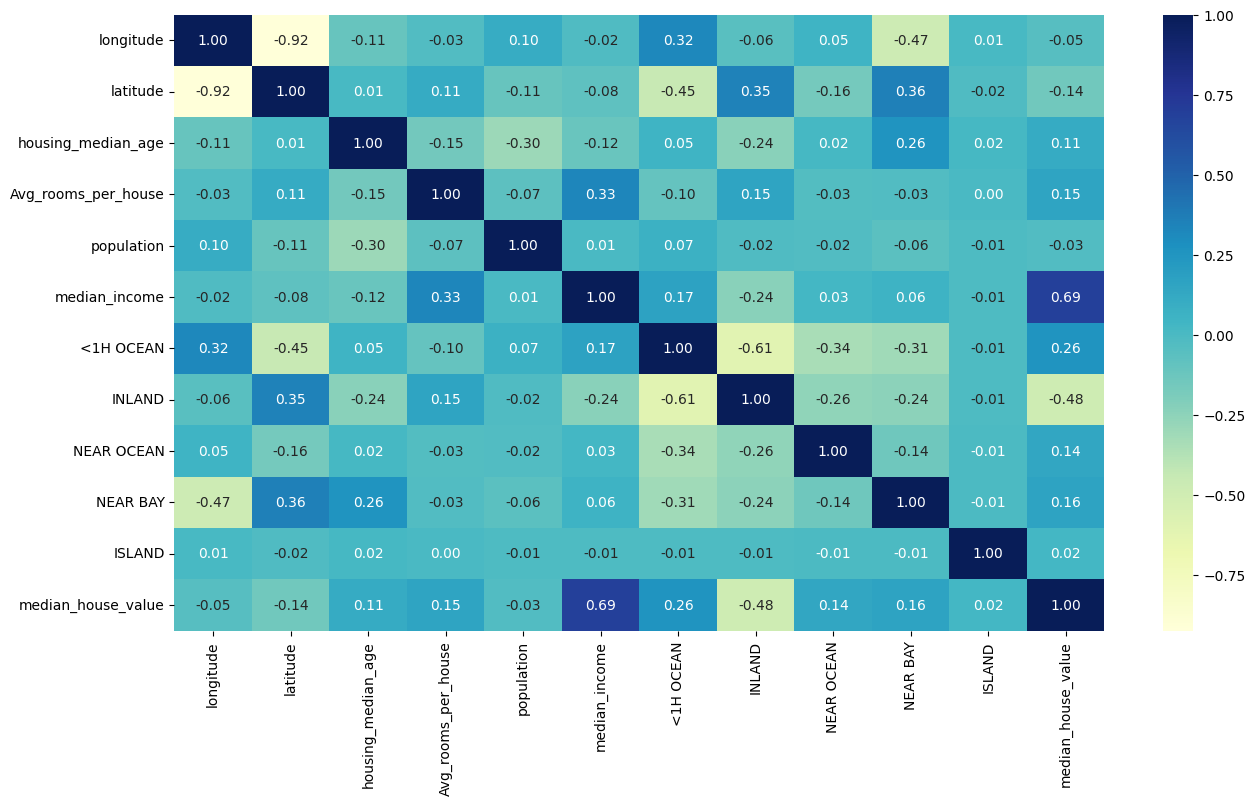

In [ ]:
plot_corr_heatmap(final_filtered_data)

# Split The data into:

1- X, Y = Input_matrix, Output_vector

2- Training and Testing data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

Scaler = StandardScaler()

#1- Random Data Spliting

In [ ]:
from sklearn.model_selection import train_test_split

X = filtered_data.drop(['median_house_value'], axis=1)
Y = filtered_data['median_house_value']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

X_train_S, X_test_S = Scaler.fit_transform(X_train), Scaler.fit_transform(X_test)

#2- Stratified Shuffle Split

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the StratifiedShuffleSplit
Split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)         # 1 split, 20% test data

# Split the data
for train_index, test_index in Split.split(filtered_data, filtered_data[['<1H OCEAN', 'INLAND', 'NEAR BAY']]):
    # Reindex the DataFrame using the generated indices
    strat_train_data = filtered_data.iloc[train_index]
    strat_test_data = filtered_data.iloc[test_index]

X_strat_train = strat_train_data.drop(['median_house_value'], axis=1)
X_strat_test = strat_test_data.drop(['median_house_value'], axis=1)

X_strat_train_S = Scaler.fit_transform(X_strat_train)
X_strat_test_S = Scaler.fit_transform(X_strat_test)

Y_strat_train = strat_train_data['median_house_value']
Y_strat_test = strat_test_data['median_house_value']

# Part_2 - Building A Linear Regression Model


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
def build_train_test(x_train, y_train, x_test, y_test):

  L_reg = LinearRegression()

  L_reg.fit(x_train, y_train)

  Y_pred_test = L_reg.predict(x_test)

  mae_test = mean_absolute_error(y_test, Y_pred_test)
  mae_normalized_train = mae_test / y_test.mean()

  print(f"Mean Absolute Error: {mae_test}\nNormalized MAE on Testing set: {mae_normalized_train}")


#Model_1 - Using Randomly split data

In [ ]:
build_train_test(X_train_S, Y_train, X_test_S, Y_test)

Mean Absolute Error: 50463.60552856244
Normalized MAE on Testing set: 0.2429120390199732


#Model_2 - Using Stratified Shuffle Split

- For some [categorical] features

In [ ]:
build_train_test(X_strat_train_S, Y_strat_train, X_strat_test_S, Y_strat_test)

Mean Absolute Error: 47735.18570272162
Normalized MAE on Testing set: 0.22956932673769206
